# Political Parties Funding - Exploratory Analysis

This notebooks intends to present an exploratory analysis about the dataset of Brazilian's political parties revenue. This dataset has been made available by Tribunal Superior Eleitoral recently (2018/06) and contains all the revenue streams of the parties in 2017.

This is a project for the Data Mining class of the Master Degree Program of CEFET/RJ (PPCIC), conducted by professor [Eduardo Ogasawara](http://eic.cefet-rj.br/~eogasawara/data-mining-course-2018-t2/)

The dataset we're going to use can be download in a .rar format and constains a CSV file for each state of the country and one for the country. We're going to work with the country level file, which is the biggest

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Loading BRASIL dataset to a pandas DataFrame
receitas_br_df = pd.read_csv('receita_anual_2017_BR.csv',
                             sep=';', encoding='latin-1',
                             na_values=['#NULO#', -1], thousands='.',
                             decimal=',', low_memory=False)

# Set pandas to only show two digits for decimals
# pd.set_option('float_format', '{:.2f}'.format)

receitas_br_df.info()
receitas_br_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330606 entries, 0 to 330605
Data columns (total 36 columns):
DT_GERACAO                        330606 non-null object
HH_GERACAO                        330606 non-null object
CD_TP_ESFERA_PARTIDARIA           330606 non-null int64
DS_TP_ESPERA_PARTIDARIA           330606 non-null object
SG_UF                             330606 non-null object
CD_MUNICIPIO                      0 non-null float64
NM_MUNICIPIO                      0 non-null float64
NR_ZONA                           0 non-null float64
NR_CNPJ_PRESTADOR_CONTA           330606 non-null int64
SG_PARTIDO                        330606 non-null object
NM_PARTIDO                        330606 non-null object
CD_TP_ORIGEM_DOACAO               329463 non-null float64
DS_TP_ORIGEM_DOACAO               329463 non-null object
NR_CPF_CNPJ_DOADOR                328645 non-null float64
NM_DOADOR                         328645 non-null object
CD_TP_ESFERA_PARTIDARIA_DOADOR    329463 non-n

,DT_GERACAO,HH_GERACAO,CD_TP_ESFERA_PARTIDARIA,DS_TP_ESPERA_PARTIDARIA,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,...,DS_TP_FONTE_RECURSO,CD_TP_NATUREZA_RECURSO,DS_TP_NATUREZA_RECURSO,CD_TP_ESPECIE_RECURSO,DS_TP_ESPECIE_RECURSO,NR_RECIBO_DOACAO,NR_DOCUMENTO,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,19/06/2018,16:59:31,0,NACIONAL,BR,NaN,NaN,NaN,59933952000100,AVANTE,...,OUTROS RECURSOS,0,Financeiro,7.0,Transferência eletrônica,NaN,NaN,20/09/2017,RECURSOS DE ORIGEM NÃO IDENTIFICADA,705.48
1,19/06/2018,16:59:31,0,NACIONAL,BR,NaN,NaN,NaN,59933952000100,AVANTE,...,FUNDO PARTIDÁRIO,0,Financeiro,NaN,NaN,NaN,NaN,07/04/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,6.01
2,19/06/2018,16:59:31,0,NACIONAL,BR,NaN,NaN,NaN,59933952000100,AVANTE,...,FUNDO PARTIDÁRIO,0,Financeiro,NaN,NaN,NaN,NaN,14/09/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,10.60
3,19/06/2018,16:59:31,0,NACIONAL,BR,NaN,NaN,NaN,59933952000100,AVANTE,...,FUNDO PARTIDÁRIO,0,Financeiro,NaN,NaN,NaN,NaN,11/10/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,10.00
4,19/06/2018,16:59:31,0,NACIONAL,BR,NaN,NaN,NaN,59933952000100,AVANTE,...,FUNDO PARTIDÁRIO,0,Financeiro,NaN,NaN,NaN,NaN,30/10/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,0.90


We can see on the dataframe info that there are some columns that have 0 values. This means that all their values are null. So, we're going to drop them from the dataframe since they'll have no use for us. We're also going to get rid of some columns that have only a single value (like `SG_UF` that is equal to `BR` for all rows).

In [80]:
def columns_single_value(df):
    
    count_dict = {}
    single_value_col = []
    
    for column in df:

        count_dict[column] = df[column].nunique()
        
        if count_dict[column] == 1:
            
            single_value_col.append(column)
        
    return single_value_col

receitas_br_df = receitas_br_df.drop(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
                                      'CD_MUNICIPIO_DOADOR', 'NM_MUNICIPIO_DOADOR',
                                      'NR_ZONA_DOADOR'], axis=1)

single_value_cols = columns_single_value(receitas_br_df)

receitas_br_df = receitas_br_df.drop(single_value_cols, axis=1)
# receitas_br_df.set_index('NR_CNPJ_PRESTADOR_CONTA', drop=True, inplace=True)

receitas_br_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330606 entries, 0 to 330605
Data columns (total 22 columns):
NR_CNPJ_PRESTADOR_CONTA      330606 non-null int64
SG_PARTIDO                   330606 non-null object
NM_PARTIDO                   330606 non-null object
CD_TP_ORIGEM_DOACAO          329463 non-null float64
DS_TP_ORIGEM_DOACAO          329463 non-null object
NR_CPF_CNPJ_DOADOR           328645 non-null float64
NM_DOADOR                    328645 non-null object
SQ_CANDIDATO_DOADOR          96 non-null float64
NR_CANDIDATO_DOADOR          96 non-null float64
CD_CANDIDATO_CARGO_DOADOR    96 non-null float64
DS_CANDIDATO_CARGO_DOADOR    96 non-null object
CD_TP_FONTE_RECURSO          330606 non-null int64
DS_TP_FONTE_RECURSO          330606 non-null object
CD_TP_NATUREZA_RECURSO       330606 non-null int64
DS_TP_NATUREZA_RECURSO       330606 non-null object
CD_TP_ESPECIE_RECURSO        330405 non-null float64
DS_TP_ESPECIE_RECURSO        330405 non-null object
NR_RECIBO_DOACAO  

Now that we have done some cleaning on the dataset, we're going to plot some graphs to gain knowledge about the data represented on it.

count    3.306060e+05
mean     2.404941e+03
std      9.066302e+04
min      1.000000e-02
25%      1.500000e+01
50%      2.823000e+01
75%      5.000000e+01
max      1.001503e+07
Name: VR_RECEITA, dtype: float64

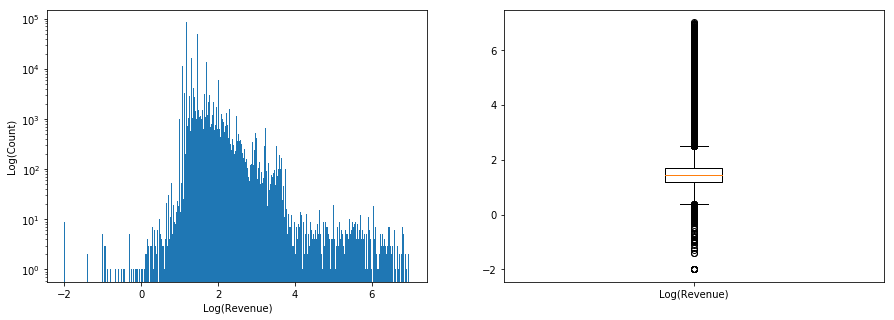

In [81]:
n_samples = len(receitas_br_df)
n_bins = int(np.sqrt(n_samples))

_ = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), facecolor='w', edgecolor='w')

_ = plt.subplot(1, 2, 1)
_ = plt.hist(np.log10(receitas_br_df['VR_RECEITA']), bins=n_bins, log=True)
_ = plt.xlabel('Log(Revenue)')
_ = plt.ylabel('Log(Count)')

_ = plt.subplot(1, 2, 2)
_ = plt.boxplot(np.log10(receitas_br_df['VR_RECEITA']), labels=['Log(Revenue)'])

receitas_br_df.VR_RECEITA.describe()

As we can see on the histogram, boxplot and on the info shown when calling `describe` function on the dataframe, the revenue value are very sparse, varying from `R$ 0.01` to `R$ 10,015,028.75` through our 330,606 data points. Having a standard deviation much bigger than the mean also show us how widely spread our values are about the mean.

We had to do some experimentation to plot the graphs on a way it could be seen because, for the histogram, when looking to the absolute values  it's turned to scientific notation and most of the data fell into the range 0 and 0.2. For the boxplot, it was impossible to see the box using the absolute values. Because of these, we decided to work with the log of the values for the plots so we can see more clearly the distribution and gain better insights. Because of this, we're going to add a new column to the dataframe with the normalized revenue values to work with it in this way instead of applying a log everytime we want to plot the data. To this normalization, we're going to apply the min-max technique.

count    330606.000000
mean          0.000240
std           0.009053
min           0.000000
25%           0.000001
50%           0.000003
75%           0.000005
max           1.000000
Name: VR_RECEITA_NORM, dtype: float64


c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,NM_PARTIDO,CD_TP_ORIGEM_DOACAO,DS_TP_ORIGEM_DOACAO,NR_CPF_CNPJ_DOADOR,NM_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CANDIDATO_CARGO_DOADOR,...,CD_TP_NATUREZA_RECURSO,DS_TP_NATUREZA_RECURSO,CD_TP_ESPECIE_RECURSO,DS_TP_ESPECIE_RECURSO,NR_RECIBO_DOACAO,NR_DOCUMENTO,DT_RECEITA,DS_RECEITA,VR_RECEITA,VR_RECEITA_NORM
0,59933952000100,AVANTE,AVANTE,7.0,ORIGEM NÃO IDENTIFICADA,NaN,NaN,NaN,NaN,NaN,...,0,Financeiro,7.0,Transferência eletrônica,NaN,NaN,20/09/2017,RECURSOS DE ORIGEM NÃO IDENTIFICADA,705.48,7.044114e-05
1,59933952000100,AVANTE,AVANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Financeiro,NaN,NaN,NaN,NaN,07/04/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,6.01,5.990996e-07
2,59933952000100,AVANTE,AVANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Financeiro,NaN,NaN,NaN,NaN,14/09/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,10.60,1.057411e-06
3,59933952000100,AVANTE,AVANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Financeiro,NaN,NaN,NaN,NaN,11/10/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,10.00,9.975009e-07
4,59933952000100,AVANTE,AVANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Financeiro,NaN,NaN,NaN,NaN,30/10/2017,JUROS E OUTRAS RENDAS - Descontos obtidos,0.90,8.886644e-08


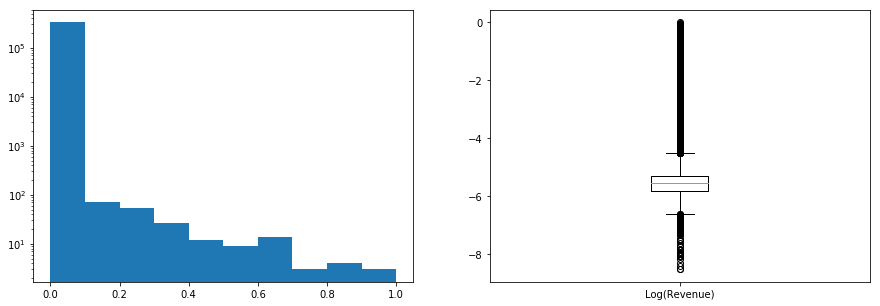

In [82]:
def get_bin_size(df):
    n_samples = len(df)
    n_bins = int(np.sqrt(n_samples))
    return n_bins

# The normalization could be done using sklearn preprocessing library, but I prefered to do directly below

receitas_br_df['VR_RECEITA_NORM'] = (((receitas_br_df['VR_RECEITA'] - min(receitas_br_df['VR_RECEITA'])) /
                                     (max(receitas_br_df['VR_RECEITA']) - min(receitas_br_df['VR_RECEITA']))) *
                                     (1-0) + 0)

# Describe the new column of the dataframe to see if normalization was done right

print(receitas_br_df['VR_RECEITA_NORM'].describe())

# Plotting the histogram and boxplot with normalized values

_ = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), facecolor='w', edgecolor='w')

bin_size = get_bin_size(receitas_br_df['VR_RECEITA_NORM'])
_ = plt.subplot(1, 2, 1)
_ = plt.hist(receitas_br_df['VR_RECEITA_NORM'], log=True)

_ = plt.subplot(1, 2, 2)
_ = plt.boxplot(np.log10(receitas_br_df['VR_RECEITA_NORM']), labels=['Log(Revenue)'])

receitas_br_df.head()

We think that different donation types may have a different range of values and distribution because the magnitude of the values for different types are probably not same. E.g.: values donated by a physical person may be much less than those whose come from the parties fund. Below we will begin to explore these differences.

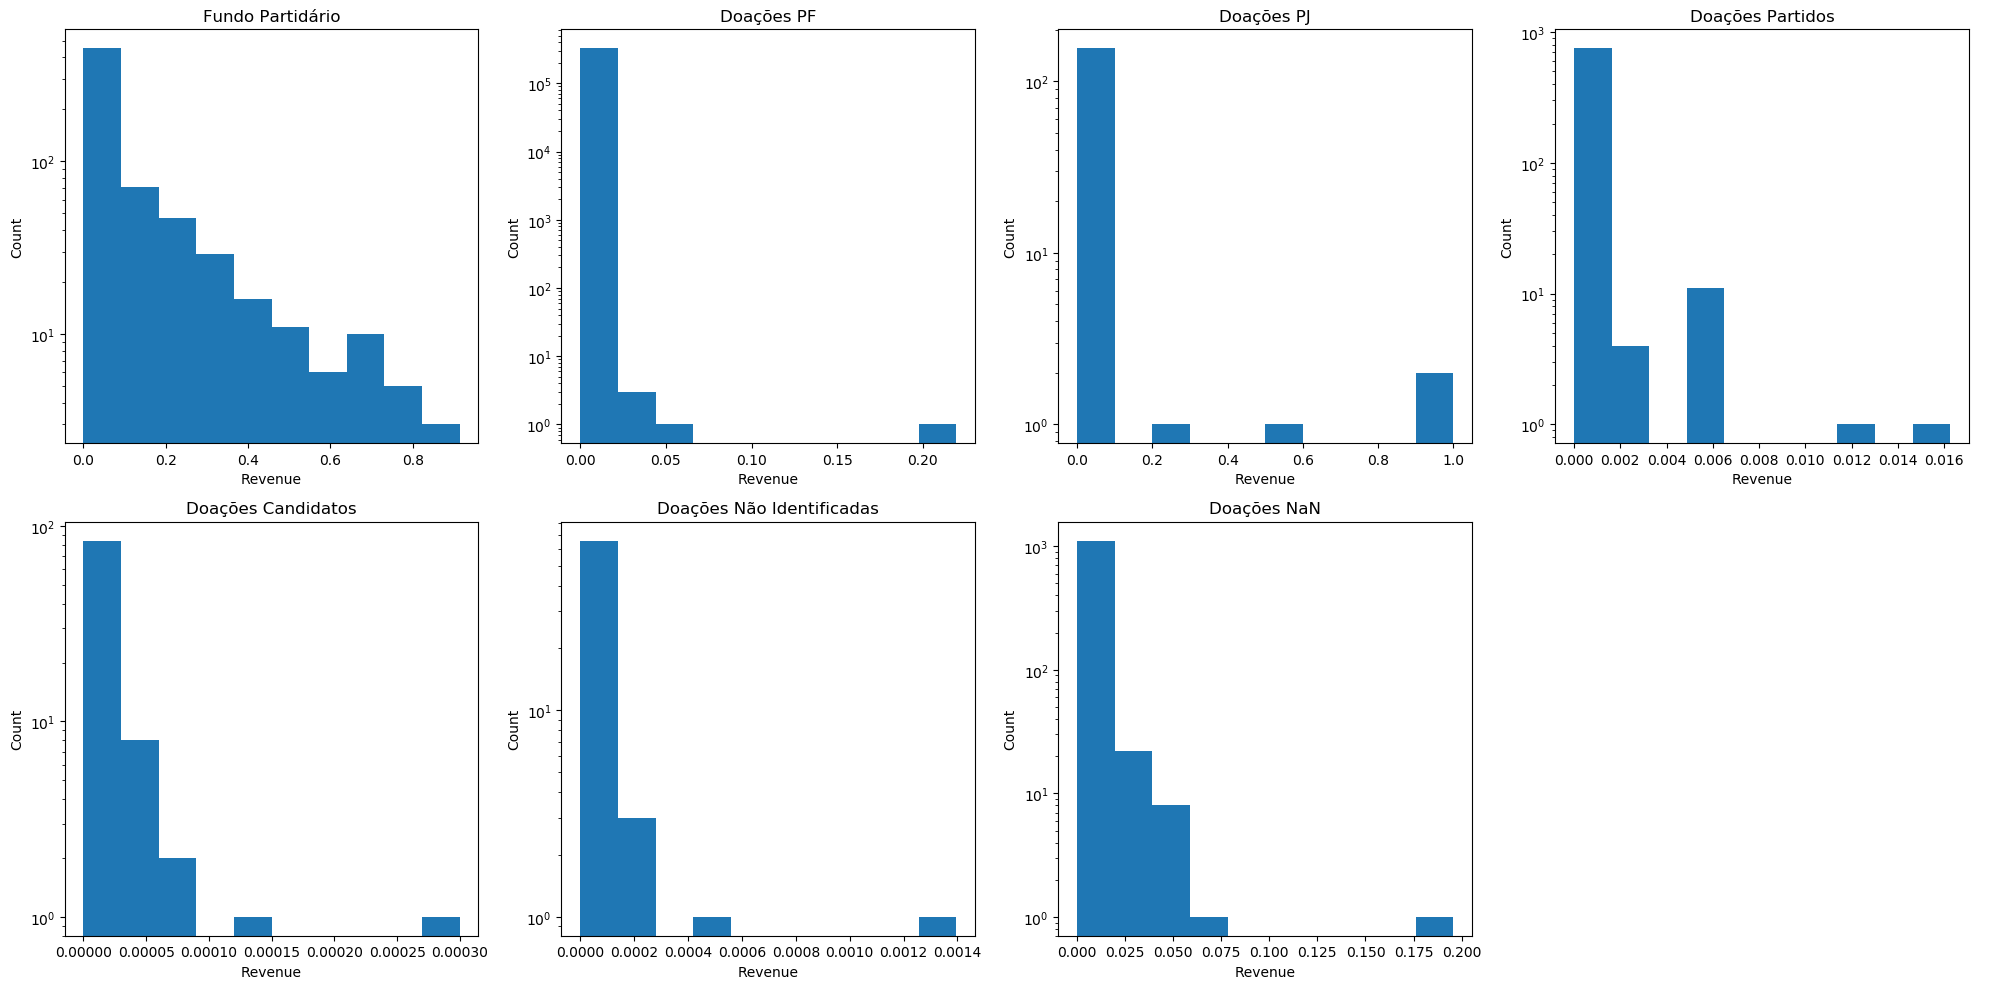

In [83]:
# Separating the different types of donations in distinct DataFrames
"""
0 - COTAS DO FUNDO PARTIDÁRIO
1 - RECURSOS DE PESSOAS FÍSICAS
2 - RECURSOS DE PESSOAS JURÍDICAS
3 - RECURSOS DE PARTIDOS POLÍTICOS
4 - RECURSOS DE CANDIDATOS
7 - ORIGEM NÃO IDENTIFICADA
"""

fundo_partidario = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 0]
doacoes_pf = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 1]
doacoes_pj = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 2]
doacoes_partidos = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 3]
doacoes_candidatos = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 4]
doacoes_undefined = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'] == 7]
doacoes_nan = receitas_br_df[receitas_br_df['CD_TP_ORIGEM_DOACAO'].isnull()]

# Plotting one histogram for each possible type of donation

_ = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='w')

bin_size = get_bin_size(fundo_partidario)
_ = plt.subplot(2, 4, 1)
_ = plt.title('Fundo Partidário')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(fundo_partidario['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_pf)
_ = plt.subplot(2, 4, 2)
_ = plt.title('Doações PF')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_pf['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_pj)
_ = plt.subplot(2, 4, 3)
_ = plt.title('Doações PJ')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_pj['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_partidos)
_ = plt.subplot(2, 4, 4)
_ = plt.title('Doações Partidos')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_partidos['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_candidatos)
_ = plt.subplot(2, 4, 5)
_ = plt.title('Doações Candidatos')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_candidatos['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_undefined)
_ = plt.subplot(2, 4, 6)
_ = plt.title('Doações Não Identificadas')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_undefined['VR_RECEITA_NORM'], log=True)

bin_size = get_bin_size(doacoes_nan)
_ = plt.subplot(2, 4, 7)
_ = plt.title('Doações NaN')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')
_ = plt.hist(doacoes_nan['VR_RECEITA_NORM'], log=True)

# Don't show the last (empty) subplot

_ = plt.subplot(2, 4, 8)
_ = plt.axis('off')

_ = plt.tight_layout()

c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


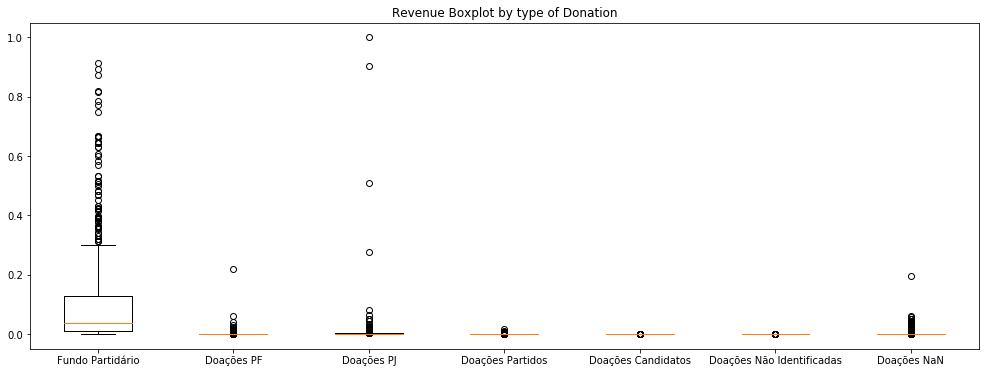

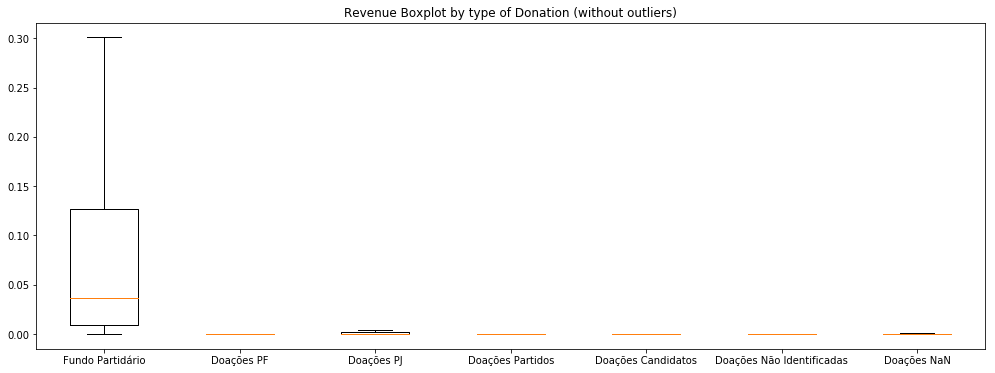

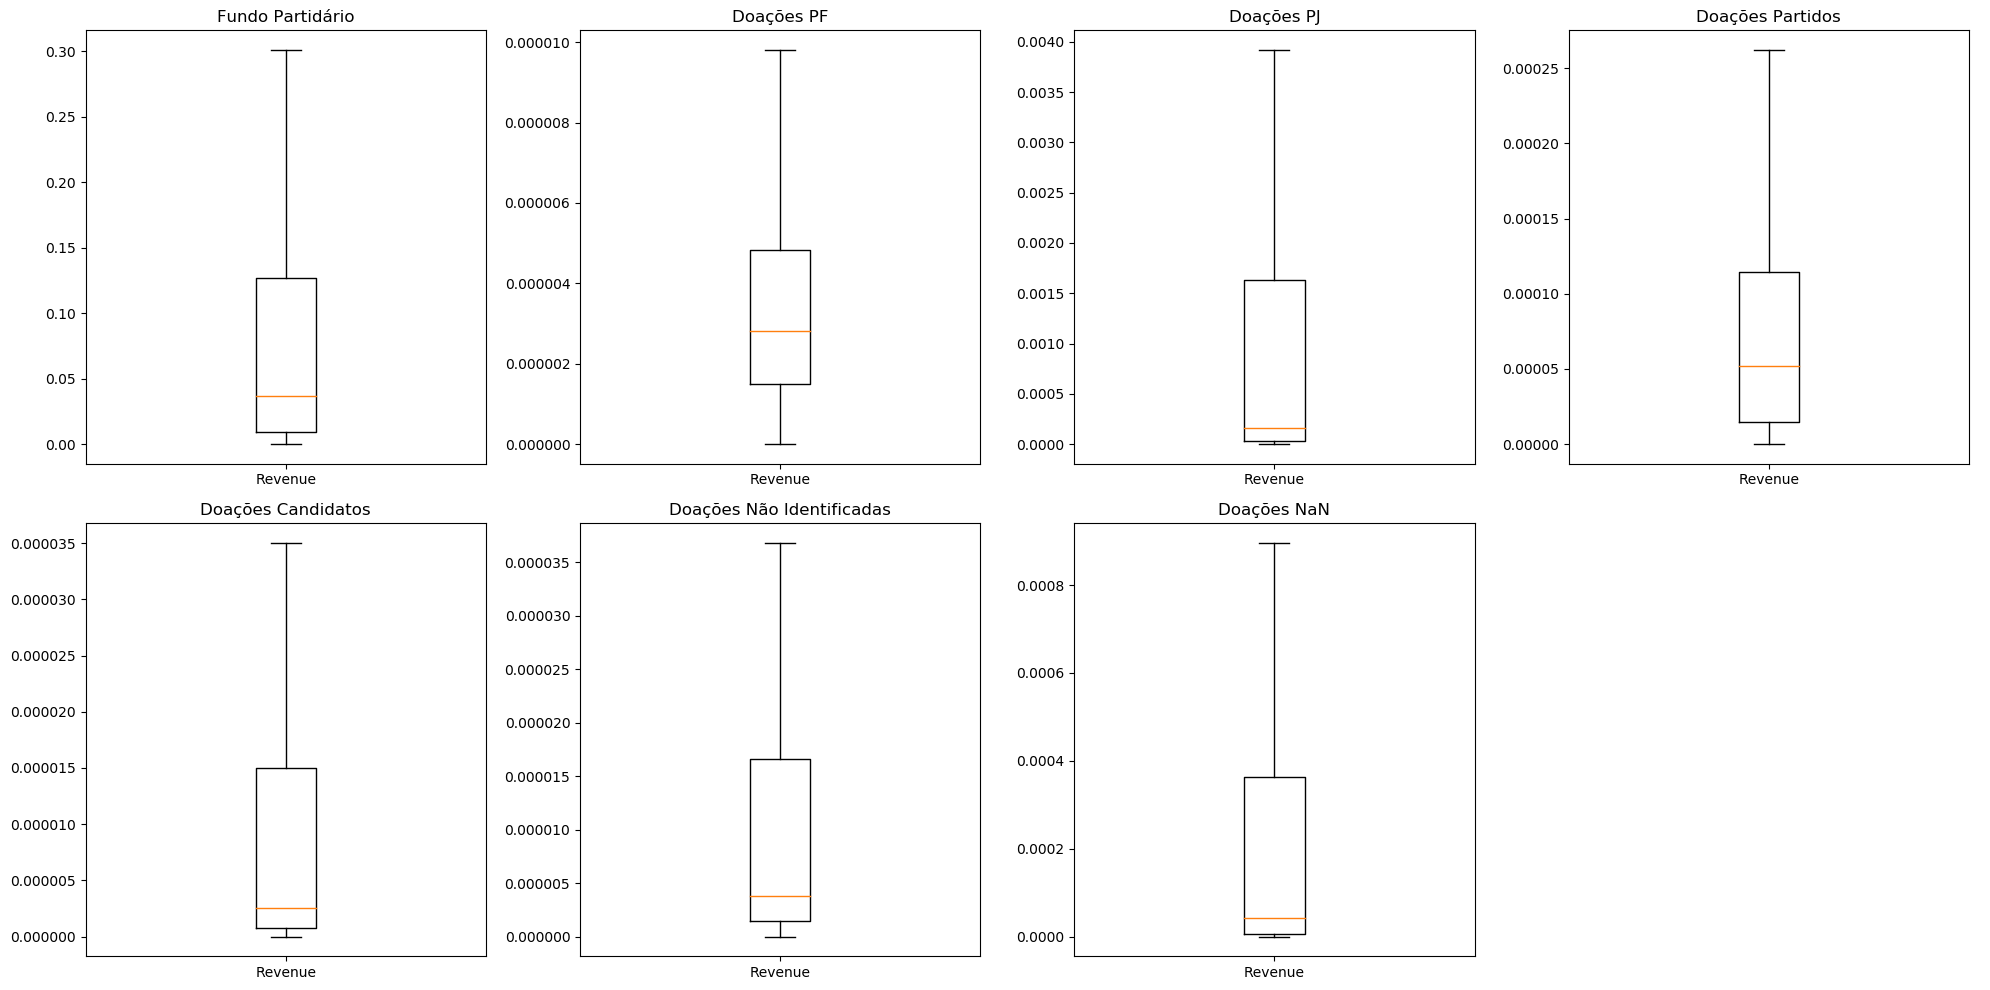

In [84]:
# Plotting all the boxes on the same graph/scale with their outliers

_ = plt.subplots(figsize=(17, 6))

_ = plt.title('Revenue Boxplot by type of Donation')
_ = plt.boxplot((fundo_partidario['VR_RECEITA_NORM'],
                 doacoes_pf['VR_RECEITA_NORM'],
                 doacoes_pj['VR_RECEITA_NORM'],
                 doacoes_partidos['VR_RECEITA_NORM'],
                 doacoes_candidatos['VR_RECEITA_NORM'],
                 doacoes_undefined['VR_RECEITA_NORM'],
                 doacoes_nan['VR_RECEITA_NORM']),
                 labels=['Fundo Partidário', 'Doações PF', 'Doações PJ',
                         'Doações Partidos', 'Doações Candidatos', 
                         'Doações Não Identificadas', 'Doações NaN'])

# Plotting all the boxes on the same graph/scale without their outliers

_ = plt.subplots(figsize=(17, 6))

_ = plt.title('Revenue Boxplot by type of Donation (without outliers)')
_ = plt.boxplot((fundo_partidario['VR_RECEITA_NORM'],
                 doacoes_pf['VR_RECEITA_NORM'],
                 doacoes_pj['VR_RECEITA_NORM'],
                 doacoes_partidos['VR_RECEITA_NORM'],
                 doacoes_candidatos['VR_RECEITA_NORM'],
                 doacoes_undefined['VR_RECEITA_NORM'],
                 doacoes_nan['VR_RECEITA_NORM']),
                 labels=['Fundo Partidário', 'Doações PF', 'Doações PJ',
                         'Doações Partidos', 'Doações Candidatos', 
                         'Doações Não Identificadas', 'Doações NaN'],
                 sym='')

# Plotting one boxplot for each possible type of donation

_ = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='w')

_ = plt.subplot(2, 4, 1)
_ = plt.title('Fundo Partidário')
_ = plt.boxplot(fundo_partidario['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 2)
_ = plt.title('Doações PF')
_ = plt.boxplot(doacoes_pf['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 3)
_ = plt.title('Doações PJ')
_ = plt.boxplot(doacoes_pj['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 4)
_ = plt.title('Doações Partidos')
_ = plt.boxplot(doacoes_partidos['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 5)
_ = plt.title('Doações Candidatos')
_ = plt.boxplot(doacoes_candidatos['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 6)
_ = plt.title('Doações Não Identificadas')
_ = plt.boxplot(doacoes_undefined['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

_ = plt.subplot(2, 4, 7)
_ = plt.title('Doações NaN')
_ = plt.boxplot(doacoes_nan['VR_RECEITA_NORM'], labels=['Revenue'], sym='')

# Don't show the last (empty) subplot

_ = plt.subplot(2, 4, 8)
_ = plt.axis('off')

_ = plt.tight_layout()

By looking to the histogram and the boxplots, it's clear that different types of donation have different scales, what makes it difficult even to see the boxes when plotting them on the same scale. Visualizing them separately is a better way to understand the shape of data for each donation type. 



Sum of Fundo Partidário: 702569763.3900008. Share of revenue: 0.8836376501953216
Sum of Doações PF: 36555499.68000959. Share of revenue: 0.04597666669157319
Sum of Doações PJ: 33635804.90000001. Share of revenue: 0.042304501492993384
Sum of Doações Partidos: 1675626.1099999982. Share of revenue: 0.0021074723046747602
Sum of Doações Candidatos: 13883.46. Share of revenue: 1.746153707467585e-05
Sum of Doações Não Identificadas: 34327.58000000001. Share of revenue: 4.31745624544531e-05
Sum of Doações NaN: 20603175.650000036. Share of revenue: 0.025913073215793062


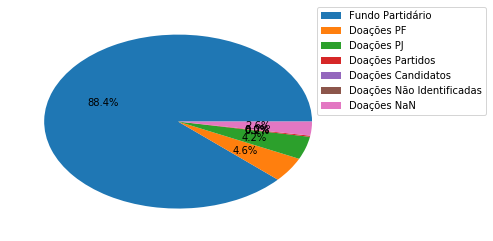

In [128]:
print('Sum of {}: {}. Share of revenue: {}'.format('Fundo Partidário',
                                                   sum(fundo_partidario['VR_RECEITA']),
                                                   sum(fundo_partidario['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))
print('Sum of {}: {}. Share of revenue: {}'.format('Doações PF',
                                                   sum(doacoes_pf['VR_RECEITA']),
                                                   sum(doacoes_pf['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))
print('Sum of {}: {}. Share of revenue: {}'.format('Doações PJ',
                                                   sum(doacoes_pj['VR_RECEITA']),
                                                   sum(doacoes_pj['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))
print('Sum of {}: {}. Share of revenue: {}'.format('Doações Partidos',
                                                   sum(doacoes_partidos['VR_RECEITA']),
                                                   sum(doacoes_partidos['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))
print('Sum of {}: {}. Share of revenue: {}'.format('Doações Candidatos',
                                                   sum(doacoes_candidatos['VR_RECEITA']),
                                                   sum(doacoes_candidatos['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))                                                  
print('Sum of {}: {}. Share of revenue: {}'.format('Doações Não Identificadas',
                                                   sum(doacoes_undefined['VR_RECEITA']),
                                                   sum(doacoes_undefined['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))                                                  
print('Sum of {}: {}. Share of revenue: {}'.format('Doações NaN',
                                                   sum(doacoes_nan['VR_RECEITA']),
                                                   sum(doacoes_nan['VR_RECEITA']) / sum(receitas_br_df['VR_RECEITA'])))

sum_revenue_types = [sum(fundo_partidario['VR_RECEITA']),
                     sum(doacoes_pf['VR_RECEITA']),
                     sum(doacoes_pj['VR_RECEITA']),
                     sum(doacoes_partidos['VR_RECEITA']),
                     sum(doacoes_candidatos['VR_RECEITA']),
                     sum(doacoes_undefined['VR_RECEITA']),
                     sum(doacoes_nan['VR_RECEITA'])]
labels = ['Fundo Partidário', 'Doações PF', 'Doações PJ',
          'Doações Partidos', 'Doações Candidatos', 
          'Doações Não Identificadas', 'Doações NaN']
_ = plt.pie(sum_revenue_types,
            autopct='%1.1f%%')
_ = plt.legend(labels, bbox_to_anchor=(0.9, 1.05))

As we can see on the pie chart above, most of the political parties revenue in 2017 came from Fundo Partidário (*parties fund*), that is a public tool to fund Brazilian's political parties. According to Tribunal Superior Eleitoral (TSE), this fund consists of "Union budget appropriations, fines, penalties, donations and other financial resources assigned to them by law".

The sum of Fundo Partidário is equal to `R$ 702,569,763` but on TSE's site, the value they say that was distributed from the fund to the parties in 2017 is `R$ 741,724,022`, summing the twelfth distribution and the fines. We're going to ask TSE about this difference on the data provided and the data published on their reports.

Since we have this difference on Fundo Partidário, we're going to focus our analysis on the other donation types, specially donations from physical and juridic people. We think that this approach is the most interest since these are the types that show people and companies support to parties. Even though the parties fund is the biggest revenue, the way it's distributed is agreed by law. If we have time, we're going to get back to it to check if the distribution is the same as is reported on TSE's site.